# Deep Learning für Visual Computing: Übungsblatt 02


**Von: Maximilian Mundt, Radmehr Nouri Inanlou**

**Abgabe: 27.04.2022**

## Importe und Hinweis

Wir haben immer mal wieder unsere Gedanken zu Aufgaben mit "**Hinweis:**" dokumentiert. Manche Aufgaben sind auch als Text gelöst, hoffentlich geht das unter den Aufgabenstellungen nicht verloren. Allgemein fanden wir es oft schwierig, den Aufgaben zu folgen, da man hier als Anfänger einfach direkt überfordert ist mit den meisten Formulierungen.

Die Vorlesungen kann man eigentlich ganz gut nachvollziehen und die theoretischen Aufgaben eigentlich bis jetzt auch (wir sind aber auch ehemalige Physiker), die praktischen Aufgaben sind aber gefühlt auf Master Niveau und für normale Bachelorstudenten wie uns kaum machbar. Zumindest verliert man schnell den Spaß, wenn man für das Verstehen der Aufgaben länger braucht als zum Lösen der Aufgaben. Wir denken mal, dass es bei den anderen auch so ist, und hoffen, dass es nicht nur an unseren mangelnden Programmierkenntnissen liegt. Vielleicht kann man darüber ja nochmal im Tutorium diskutieren. :)

In [567]:
import torch
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams.update({"font.size": 14})


## a) Uneingeschränkte Optimierung

Implementieren Sie eine Funktion `rosenbrock(x, y, a, b)`, die sowohl den Funktionswert $f(x, y)$ entsprechend Gleichung (1) für die Parameter $a, b$ zurückgibt, als auch
den Wert des Gradienten $\nabla f(x, y)$.

In [568]:
def rosenbrock(x, y, a, b):
    f = (a - x) ** 2 + b * (y - x**2) ** 2

    gradient = np.array([
        -2 * a + 4 * b * x**3 - 4 * b * x * y + 2 * x,
        2 * b * (y - x**2)
    ])

    return f, gradient


Implementieren Sie eine Funktion, die die Rosenbrock Funktion als logarithmisches
Konturdiagramm (logarithmisch entlang $z$-Achse) im Intervall $[−4, 4]^2$ mit Parametern
$a = 1$ und $b = 100$ visualisiert. Zusätzlich soll in dem selben Plot das globale Minimum
$(x, y) = (1, 1)$ der Funktion markiert sein.


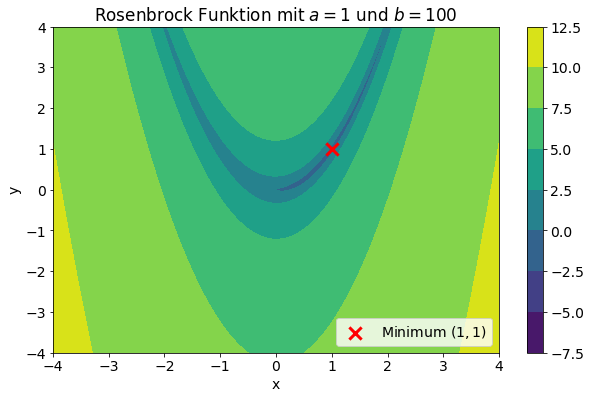

In [569]:
def rosenbrock_contour(optimizer=None, history=None):
    a = 1
    b = 100

    x = y = np.linspace(-4, 4, 1000)
    X, Y = np.meshgrid(x, y)

    Z = np.log(rosenbrock(X, Y, a, b)[0])

    fig, ax = plt.subplots(1, 1, figsize=(10, 6))

    cs = ax.contourf(X, Y, Z, zorder=0)
    fig.colorbar(cs)

    if not history is None:
        label = "Steps"
        if optimizer:
            label = str(optimizer.__class__.__name__)
        ax.scatter(history[:, 0], history[:, 1], color="blue", alpha=0.4, label=label)

    ax.scatter(1, 1, 150,color="red", label="Minimum $(1,1)$", marker="x", linewidths=3)

    ax.legend(loc="lower right")
    ax.set_title("Rosenbrock Funktion mit $a=1$ und $b=100$")
    ax.set_xlabel("x")
    ax.set_ylabel("y")

    # plt.savefig("figure.png", dpi=300, facecolor="white")
    plt.show()


rosenbrock_contour()


Implementieren Sie eine Klasse `GradientDescent`, die Gradientenabstieg ohne Momentum verwendet, um den Parameter optimieren.

In [570]:
class GradientDescent:
    def __init__(self, theta, learning_rate):
        self.theta = theta
        self.learning_rate = learning_rate

    def step(self, grad):
        self.theta = self.theta - self.learning_rate * grad


Implementieren Sie eine Klasse `MomentumGradientDescent`, die Gradientenabstieg mit
Momentum verwendet, um den Parameter optimieren.

In [571]:
class MomentumGradientDescent:
    def __init__(self, theta, learning_rate, momentum_coef, initial_velocity):
        self.theta = theta
        self.learning_rate = learning_rate
        self.momentum_coef = momentum_coef
        self.velocity = initial_velocity

    def step(self, grad):
        self.velocity = self.momentum_coef * self.velocity - self.learning_rate * grad
        self.theta = self.theta + self.velocity


Implementieren Sie eine Klasse `RMSPropGradientDescent`, die RMSProp ohne Momentum verwendet, um den Parameter optimieren.

In [572]:
class RMSPropGradient:
    def __init__(self, theta, learning_rate, decay_rate, small_constant):
        self.theta = theta
        self.learning_rate = learning_rate
        self.decay_rate = decay_rate
        self.small_constant = small_constant
        self.squared_gradient = 0

    def step(self, grad):
        self.squared_gradient = self.decay_rate * self.squared_gradient + (
            1 - self.decay_rate
        ) * (grad**2)
        parameter_update = (
            -1 * self.learning_rate / np.sqrt(self.small_constant + self.squared_gradient) * grad
        )
        self.theta = self.theta + parameter_update


Implementieren Sie eine Klasse `AdaMomentumGradientDescent`, die RMSProp mit Momentum kombiniert, um den Parameter optimieren.

**Hinweis:** Die Aufgabe war irgendwie nicht eindeutig formuliert. Deswegen haben wir uns nach der Anweisung "RMSProp mit Momentum" gehalten und nicht an den Namen "AdaMomentumGradientDescent".

In [573]:
class MomentumRMSPropGradient:
    def __init__(
        self, theta, learning_rate, decay_rate, momentum_coef, initial_velocity
    ):
        self.theta = theta
        self.learning_rate = learning_rate
        self.decay_rate = decay_rate
        self.momentum_coef = momentum_coef
        self.velocity = initial_velocity
        self.squared_gradient = 0

    def step(self, grad):
        new_theta = self.theta + self.momentum_coef * self.velocity
        grad = rosenbrock(new_theta[0], new_theta[1], 1, 100)[1]

        self.squared_gradient = self.decay_rate * self.squared_gradient + (
            1 - self.decay_rate
        ) * (grad**2)

        self.velocity = (
            self.momentum_coef * self.velocity
            - self.learning_rate / np.sqrt(self.squared_gradient) * grad
        )

        self.theta = self.theta + self.velocity


Verwenden Sie die Methoden um das globale
Minimum der Rosenbrock Funktion zu finden, angefangen von dem Punkt $(x, y) = (−2, −2)$.
Implementieren Sie dazu eine Funktion `optimize(optim, steps)`, die eine Instanz eines
Optimierungsverfahrens als Argument nimmt und den Algorithmus `steps`-mal anwendet
um das Minimum der Rosenbrock Funktion mit Parameter $a = 1$, $b = 100$ zu finden. 

In [574]:
def optimize(optim, steps):
    points = []

    for _ in range(steps):
        points.append(optim.theta)
        x = optim.theta[0]
        y = optim.theta[1]

        gradient = rosenbrock(x, y, 1, 100)[1]

        optim.step(gradient)

    return np.array(points)


Ein Vergleich der Methoden in dem alle Verfahren die selben Hyperparameter verwenden und für die gleiche Anzahl an Schritten angewendet werden.

**Hinweis:** Für diese Aufgabe haben wir 1000 Steps gewählt und eine Learning Rate von 0.0002. Die Optimizer haben ja alle unterschiedliche Hyperparameter, deswegen haben wir die identischen versucht gleich zu halten und die unterschiedlichen random gewählt.

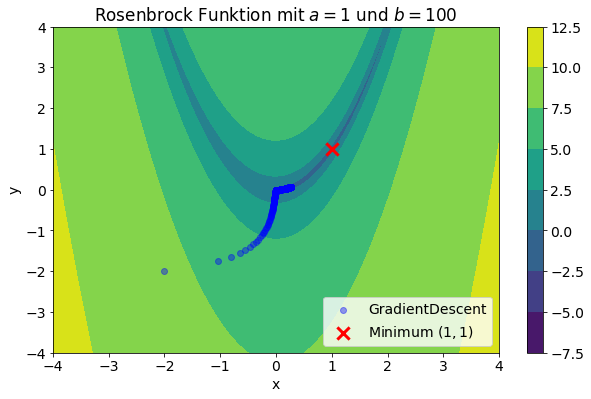

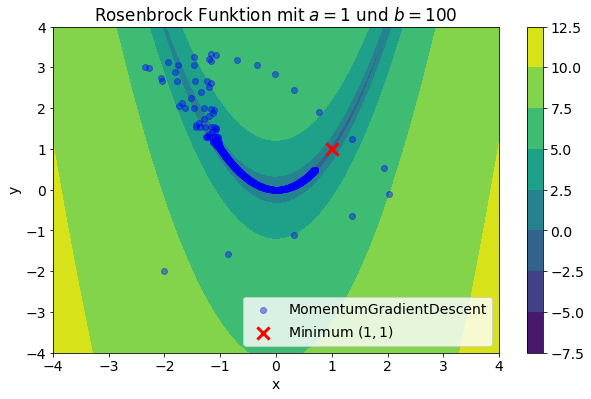

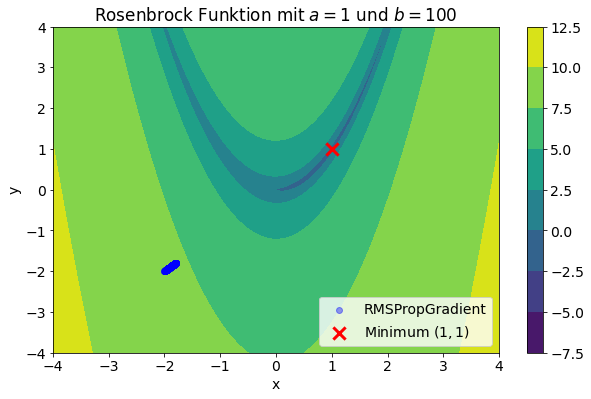

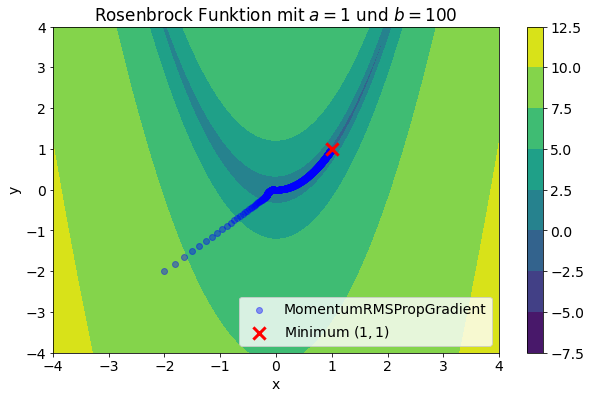

In [575]:
starting_point = np.array([-2, -2])
learning_rate = 0.0002
optimizers = [
    GradientDescent(starting_point, learning_rate),
    MomentumGradientDescent(
        starting_point,
        learning_rate=learning_rate,
        momentum_coef=0.9,
        initial_velocity=0.2,
    ),
    RMSPropGradient(
        starting_point, learning_rate=learning_rate, decay_rate=0.9, small_constant=1e-7
    ),
    MomentumRMSPropGradient(
        starting_point,
        learning_rate=learning_rate,
        decay_rate=0.9,
        momentum_coef=0.9,
        initial_velocity=0.2,
    ),
]

for optimizer in optimizers:
    point_history = optimize(optimizer, steps=1000)
    rosenbrock_contour(optimizer, point_history)


Ein Vergleich der Methoden in dem alle Verfahren optimiere Hyperparameter verwenden und für eine optimiere Anzahl von Schritten angewendet wird.

**Hinweis:** Die Parameter sind hier jetzt natürlich nicht perfekt, aber wir haben grob versucht, die Leistung per Trial and Error zu optimieren.

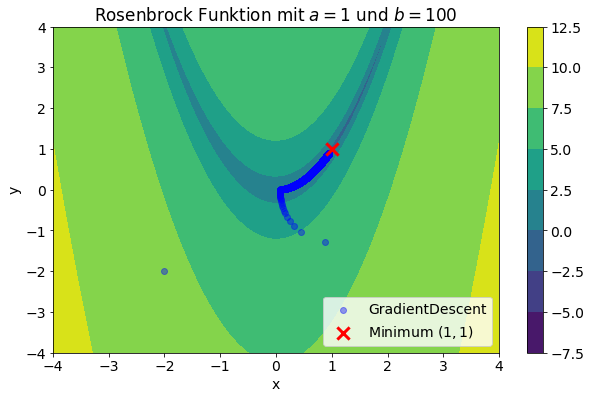

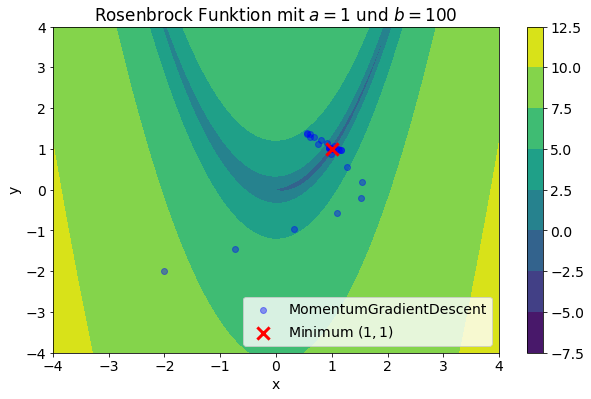

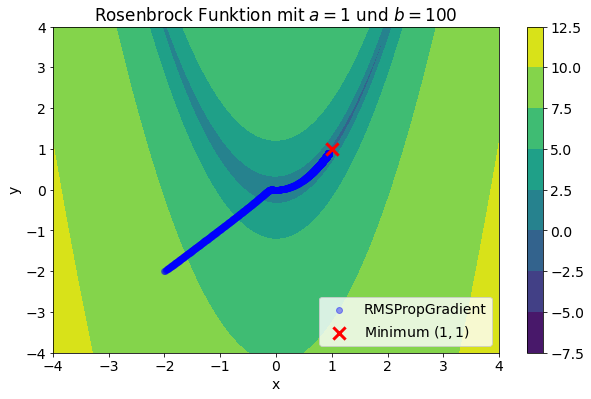

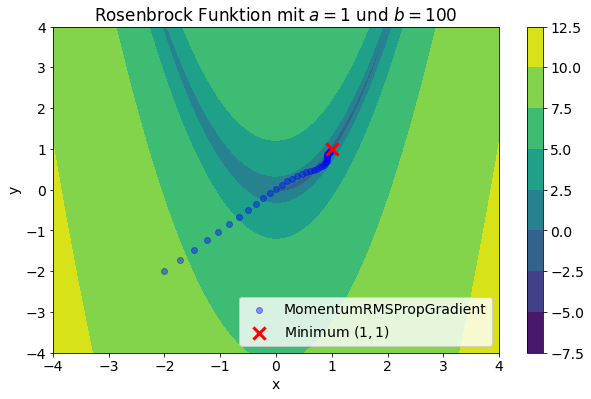

In [576]:
starting_point = np.array([-2, -2])

# [(Optimizer1, steps1), (Optimizer2, steps2), ...]
optimizers = [
    (GradientDescent(starting_point, learning_rate=0.0006), 8000),
    (
        MomentumGradientDescent(
            starting_point,
            learning_rate=0.0002,
            momentum_coef=0.75,
            initial_velocity=0.4,
        ),
        30,
    ),
    (
        RMSPropGradient(
            starting_point, learning_rate=0.005, decay_rate=0.9, small_constant=1e-6
        ),
        2000,
    ),
    (
        MomentumRMSPropGradient(
            starting_point,
            learning_rate=0.004,
            decay_rate=0.2,
            momentum_coef=0.9,
            initial_velocity=0.3,
        ),
        40,
    ),
]

for optimizer, steps in optimizers:
    point_history = optimize(optimizer, steps=steps)
    rosenbrock_contour(optimizer, point_history)


Erläutern Sie Ihre Beobachtungen. Gehen Sie dabei besonders auf die Magnitude der
Gradientenwerte, die Rolle der adaptiven Lernrate und des Momentumterm ein.

Man sieht deutlich, dass die beiden Optimierungsverfahren mit Momentum deutlich weniger Schritte benötigen, um zum Minimum zu gelangen. Die anderen beiden Verfahren haben dabei trotz "optimierter Hyperparameter" Schwierigkeiten. Auch sieht man, dass bei Plot 2 und 4 die Lernrate viel besser adaptiert wird, da der Abstand zwischen den Schritten besser abgeschätzt wird.

## b) Mini-Batch Optimierung in Pytorch

Erstellen Sie einen Tensor, der für $x, y = (−1, −1)$ speichert und stellen Sie sicher, dass
für diesen ein Gradient berechnet wird.

In [577]:
theta = torch.Tensor((-1, -1))
theta.requires_grad_()

print(theta)

tensor([-1., -1.], requires_grad=True)


Wählen Sie einen Optimierungsalgorithmus aus dem `torch.optim` Submodul aus und
erzeugen Sie eine Instanz dieses Optimierers bei dem Sie den zuvor erzeugten Tensor
als Parameter übergeben.

In [578]:
optimizer = torch.optim.RMSprop([theta], lr=0.02, weight_decay=0.2, momentum=0.9, alpha=0.9)

Implementieren Sie eine Funktion `rosenbrock_th(x, y, a, b)`, die nur Gleichung 1 berechnet (die Funktion muss nicht den Wert des Gradienten zurückgeben).

In [579]:
def rosenbrock_th(x, y, a, b):
    return (a - x) ** 2 + b * (y - x**2) ** 2


Optimieren Sie den Parameter für 1000 Schritte. Achten Sie darauf, dass in der Schleife
Ihres Programms, `optimizer.zero_grad()`, `loss.backward()` und `optimizer.step()`
in der richtigen Reihenfolge aufgerufen werden.

In [580]:
point_history = []

for _ in range(1000):
    point_history.append(theta.detach().clone().numpy())
    x_pred = theta[0]
    y_pred = theta[1]
    pred = rosenbrock_th(x_pred, y_pred, 1, 100)
    pred.backward()
    
    optimizer.step()
    optimizer.zero_grad()

point_history = np.array(point_history)

Visualisieren Sie die Rosenbrock Funktion, ihr Minimum und die Punkte, die während der Optimierung erzeugt wurden, in einem Plot.

**Hinweis:** Hier haben wir es irgendwie nicht geschafft, die Hyperparameter gut zu optimieren, weil alle Punkte ab einem gewissen grad immer kurz vor dem Minimum stecken geblieben sind.

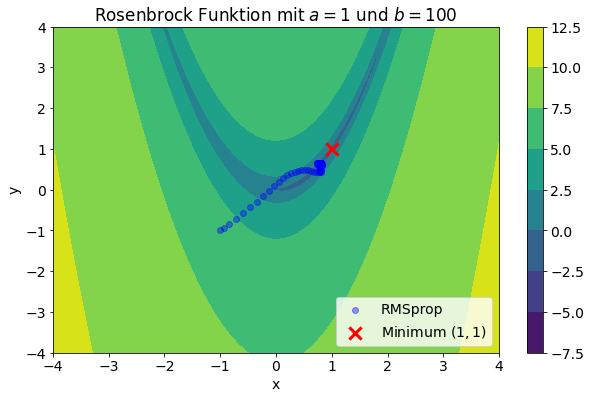

In [581]:
rosenbrock_contour(optimizer, point_history)

Implementieren Sie eine Klasse, die von torch.nn.Module erbt. Stellen Sie sicher,
dass im Konstruktor Ihrer Klasse, der Konstruktor der Elternklasse aufgerufen wird.
Dar¨uber hinaus soll der Konstruktor Ihrer Klasse die Parameter $a', b'$ als Membervariablen hinzufügen und mit zuf¨alligen Werten initialisieren. Zusätzlich soll Ihre Klasse
noch die Methode `forward(self, xy)` implementieren, die den Funktionswert der
Rosenbrock Funktion für die Argumente $x, y$ mit den Parametern $a', b'$
zurückgibt.

In [582]:
class Model(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.a_prime = torch.rand(1)
        self.b_prime = torch.rand(1)

    def forward(self, x, y):
        return rosenbrock_th(x, y, self.a_prime, self.b_prime)


Erzeugen Sie eine Instanz Ihrer Klasse und verwenden Sie den mini-batch Ansatz
aus der Vorlesung zusammen mit den oben beschrieben Techniken um den erwarteten L1-Fehler zwischen der Schätzung Ihrer Klasse $f'(x, y)$ und der tatsächlichen Werten
$z = f(x, y)$ zu minimieren

In [583]:
model = Model()

# keine Ahnung

Visualisieren Sie die Fehlerkurve für die ersten 100 Schritte der Optimierung bei einer
Batchgröße von 1, 32 und 128 in einem Plot. Welchen Einfluss hat die Batchgröße auf
das Konvergenzverhalten der Optimierung?

In [584]:
# keine Ahnung

## c) Optimierung mit Nebenbedingungen

Implementieren Sie eine Klasse `ConstraintOptimizer`, die von der Klasse
`torch.optim.Optimizer` erbt. Der Konstruktor Ihrer Klasse soll eine Liste von Parametern und eine Lernrate als Argument erwarten. Erstellen Sie ein Dictionary, das
einen Schlüssel `lr` mit den Lernraten als Wert enthält. Rufen Sie den Konstruktor der
übergeordneten Klasse auf und übergeben Sie die Parameterliste und das Dictionary als Argumente.


In [585]:
class ContraintOptimizer(torch.optim.Optimizer):
    def __init__(self, parameters, learning_rate):
        super().__init__(parameters, {
            "lr": learning_rate
        })

    @torch.no_grad()
    def step(self, closure=None):
        # Keine Ahnung
        pass
    

Implementieren Sie eine Memberfunktion `step(self, closure=None)`, die den Decorator `@torch.no grad()` verwendet. Diese Funktion soll jeden Parameter in der Parameterliste aktualisieren. Weitere Einzelheiten finden Sie in der Referenzimplementierung der Klasse SGD. Anstelle der standardmäßigen additiven Aktualisierungsregel
für den Gradientenabstieg sollen Sie eine benutzerdefinierte Aktualisierungsregel implementieren:

In [586]:
# keine Ahnung

Verwenden Sie Ihre Optimiererklasse, um eine Lösung für Gleichung 2 zu finden...

In [587]:
# keine Ahnung